# Gramener-Product Team Hiring Exercise


# Python:
### Given two lists L1 = ['a', 'b', 'c'], L2 = ['b', 'd'], find common elements, find elements present in L1 and not in L2?

### How many Thursdays were there between 1990 - 2000?

### Given the following Javascript array:

### var data = [0, 1, 2, 'stop', 2, 0, 1, 'stop']

### write a Javascript function or expression that returns an array with just the zeroes removed.


In [154]:
# 1. Given two lists L1 = ['a', 'b', 'c'], L2 = ['b', 'd'], find common elements, find elements present in L1 and not in L2?

#  Solution
   #Printing Common elements 
L1 = ['a', 'b', 'c']
L2 = ['b', 'd']
print list(set(L1).intersection(set(L2)))
               # Or
print list(set(L1) & (set(L2)))

   #Printing elements in L1 not in L2
print [x for x in L1 if x not in L2]
             #or
print filter(lambda x: x not in L2, L1)

# 2. How many Thursdays were there between 1990 - 2000?
from datetime import datetime
from dateutil import rrule

print len(list(rrule.rrule(rrule.DAILY,
                         dtstart=datetime(1990, 1, 1),
                         until=datetime(2000, 12, 31),
                         byweekday=[rrule.TH])))



from datetime import date
import datetime
import calendar
d0 = date(1990, 1, 1)
d1 = date(2000, 12, 31)
delta = d0 - d1
print delta.days
print list(calendar.day_abbr)
print calendar.day_abbr[3] 

from datetime import datetime
sum(datetime(year, month, 1).weekday() == 4
      for year in range(1950, 2051) for month in range(1,13))

['b']
['b']
['a', 'c']
['a', 'c']
574
-4017
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Thu


174

# Use case 1 - National Achievement Survey 

### By Gopala Krishna Chaitanya Y


# 1. What influences students performance the most?

In [130]:
#Loding and importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.plotly as py
import plotly.graph_objs as go
from scipy import stats
from sklearn import preprocessing as prep
from sklearn.preprocessing import Imputer
import sklearn as sk;
import pylab as pl
plt.style.use('ggplot')
%matplotlib notebook
%matplotlib inline
# suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [131]:
#Reading the data from CSV files and imputing mean value for all the subject marks
pupil_marks = pd.read_csv('gramener-usecase-nas/nas-pupil-marks.csv')
labels = pd.read_csv('gramener-usecase-nas/nas-labels.csv')
pupil_marks.isnull().sum()
pupil_marks['Maths %'].fillna((pupil_marks['Maths %'].mean()), inplace=True)
pupil_marks['Reading %'].fillna((pupil_marks['Reading %'].mean()), inplace=True)
pupil_marks['Science %'].fillna((pupil_marks['Science %'].mean()), inplace=True)
pupil_marks['Social %'].fillna((pupil_marks['Social %'].mean()), inplace=True)

In [132]:
#Mapping the Categorical variables to numerical as we can perform analysis on these features once transformed
pupil_marks['Use computer'] = pupil_marks['Use computer'].map({"Yes":1,"No":0})
pupil_marks['Subjects'] = pupil_marks['Subjects'].map({'L':1, 'S':2, 'O':3, 'M':4, '0':0})
pupil_marks['Use computer']
for col in ['Use computer', 'Subjects']:
    pupil_marks[col] = pupil_marks[col].astype('category')
pupil_marks = pupil_marks.fillna(pupil_marks.median())
#checking if there are any NaNs in the data
pupil_marks.isnull().sum()

STUID                     0
State                     0
District                  0
Gender                    0
Age                       0
Category                  0
Same language             0
Siblings                  0
Handicap                  0
Father edu                0
Mother edu                0
Father occupation         0
Mother occupation         0
Below poverty             0
Use calculator            0
Use computer              0
Use Internet              0
Use dictionary            0
Read other books          0
# Books                   0
Distance                  0
Computer use              0
Library use               0
Like school               0
Subjects                  0
Give Lang HW              0
Give Math HW              0
Give Scie HW              0
Give SoSc HW              0
Correct Lang HW           0
                         ..
Private tuition           0
English is difficult      0
Read English              0
Dictionary to learn       0
Answer English WB   

In [133]:
#Calcualting average of all the subject marks to create and calculate the feature 'Performance' 
summary_ave_data = pupil_marks[['Maths %', 'Reading %', 'Science %', 'Social %']]
pupil_marks['Performance'] = summary_ave_data.mean(axis=1)
pupil_marks['Performance'].describe()
pupil_marks.head(10)

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %,Performance
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,4,3,4,4,20.370000,46.208704,27.780000,38.357868,33.179143
1,11011001002,AP,1,2,3,4,2,5,2,2,...,4,4,3,4,4,12.960000,46.208704,38.180000,38.357868,33.926643
2,11011001003,AP,1,2,3,4,2,5,2,1,...,4,3,3,4,4,27.780000,70.000000,36.414637,38.357868,43.138126
3,11011001004,AP,1,2,3,3,2,4,2,1,...,4,3,3,4,4,32.244413,56.670000,36.414637,36.000000,40.332263
4,11011001005,AP,1,2,3,3,2,5,2,1,...,2,3,3,4,4,32.244413,46.208704,14.550000,8.330000,25.333279
5,11011001006,AP,1,2,3,3,1,5,2,3,...,4,3,2,4,4,32.244413,23.330000,36.414637,30.000000,30.497263
6,11011001007,AP,1,2,3,4,2,2,2,1,...,4,4,4,4,4,40.740000,70.000000,36.414637,38.357868,46.378126
7,11011001008,AP,1,2,2,0,2,4,2,1,...,4,3,3,3,4,32.244413,26.670000,36.414637,22.920000,29.562263
8,11011001009,AP,1,2,3,3,2,4,2,1,...,4,3,3,4,4,24.070000,46.208704,25.450000,38.357868,33.521643
9,11011001010,AP,1,2,2,4,2,3,2,1,...,4,3,4,3,4,18.520000,26.670000,36.414637,38.357868,29.990626


In [134]:
# Here I have created new dataframe with all the features to analyse
Pupil_features=['Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe experiments', 'Conduct experiments',
       'Solve science problems', 'Express science views', 'Watch TV',
       'Read magazine', 'Read a book', 'Play games', 'Help in household']

Pupil_feature_data = pd.DataFrame(pupil_marks,columns=Pupil_features)

In [136]:
#Running linear Regression on Performance to see how is it dependent
import statsmodels.api as sm
from sklearn import linear_model
X = Pupil_feature_data
y = pupil_marks['Performance']
lm = linear_model.LinearRegression()
linmodel = lm.fit(X,y)
predictions = linmodel.predict(X)
print(predictions)
print(linmodel.score(X,y))
linmodel

[ 38.99097093  39.4228907   36.99469529 ...,  39.54668006  38.08557616
  39.22755634]
0.0903648920256


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#Running ElasticNet model to find the dependency of Performance
import statsmodels.api as sm
from sklearn import linear_model
X = Pupil_feature_data
y = pupil_marks['Performance']
model_ElasticNet = linear_model.ElasticNet()
model_ElasticNet.fit(X, y)
print (model_ElasticNet.score(X, y))

0.0399623704118


In [137]:
# Splitting the data to training and test data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

train, test = train_test_split(Pupil_feature_data, test_size=0.2)

In [14]:
# Created  Random Forest Regressor model that identifies the most influencing feature on the Overal Performance of the student
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
 
X = Pupil_feature_data.values
Y = pupil_marks['Performance'].values
names = Pupil_features
 
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
print sorted(scores, reverse=True)
scoresdf=pd.DataFrame(sorted(scores, reverse=True)) 
scoresdf.columns= ["Scores of Importance", "Features"]
scoresdf


[(0.025, 'Father edu'), (0.019, 'Mother edu'), (0.018, 'Science is difficult'), (0.017, 'Father occupation'), (0.015, 'Help in household'), (0.014, 'Read other books'), (0.014, 'English is difficult'), (0.013, 'Use dictionary'), (0.013, 'Express science views'), (0.012, 'Solve science problems'), (0.012, 'SocSci is difficult'), (0.012, 'Observe experiments'), (0.012, 'Correct SocS HW'), (0.012, '# Books'), (0.011, 'Maths is difficult'), (0.011, 'Give SoSc HW'), (0.011, 'Give Scie HW'), (0.011, 'Dictionary to learn'), (0.011, 'Correct Scie HW'), (0.011, 'Computer use'), (0.011, 'Below poverty'), (0.01, 'Express SocSci views'), (0.01, 'Explain answers'), (0.01, 'Answer English WB'), (0.009, 'Small groups in SocSci'), (0.009, 'Read magazine'), (0.009, 'Participate in SocSci'), (0.009, 'Give Math HW'), (0.008, 'Use calculator'), (0.008, 'Read a book'), (0.008, 'Historical excursions'), (0.008, 'Correct Math HW'), (0.008, 'Conduct experiments'), (0.008, 'Age'), (0.007, 'Subjects'), (0.007, 

,Scores of Importance,Features
0,0.025,Father edu
1,0.019,Mother edu
2,0.018,Science is difficult
3,0.017,Father occupation
4,0.015,Help in household
5,0.014,Read other books
6,0.014,English is difficult
7,0.013,Use dictionary
8,0.013,Express science views
9,0.012,Solve science problems


[(0.011, 'Computer use'), (0.005, 'Help in household'), (0.005, 'Father occupation'), (0.004, 'Subjects'), (0.004, 'Maths is difficult'), (0.004, 'Father edu'), (0.004, 'Dictionary to learn'), (0.003, 'Solve science problems'), (0.003, 'Give Scie HW'), (0.003, 'Correct SocS HW'), (0.003, 'Correct Math HW'), (0.003, 'Below poverty'), (0.002, 'SocSci is difficult'), (0.002, 'Small groups in SocSci'), (0.002, 'Science is difficult'), (0.002, 'Play games'), (0.002, 'Participate in SocSci'), (0.002, 'Library use'), (0.002, 'Give SoSc HW'), (0.002, 'Give Math HW'), (0.002, 'Give Lang HW'), (0.002, 'Express science views'), (0.002, 'Express SocSci views'), (0.002, 'English is difficult'), (0.002, 'Correct Scie HW'), (0.002, 'Correct Lang HW'), (0.002, 'Answer English WB'), (0.001, 'Watch TV'), (0.001, 'Use dictionary'), (0.001, 'Solve Maths in groups'), (0.001, 'Siblings'), (0.001, 'Read other books'), (0.001, 'Read magazine'), (0.001, 'Read a book'), (0.001, 'Read English'), (0.001, 'Private

,Maths Scores of Importance,Features
0,0.011,Computer use
1,0.005,Help in household
2,0.005,Father occupation
3,0.004,Subjects
4,0.004,Maths is difficult
5,0.004,Father edu
6,0.004,Dictionary to learn
7,0.003,Solve science problems
8,0.003,Give Scie HW
9,0.003,Correct SocS HW


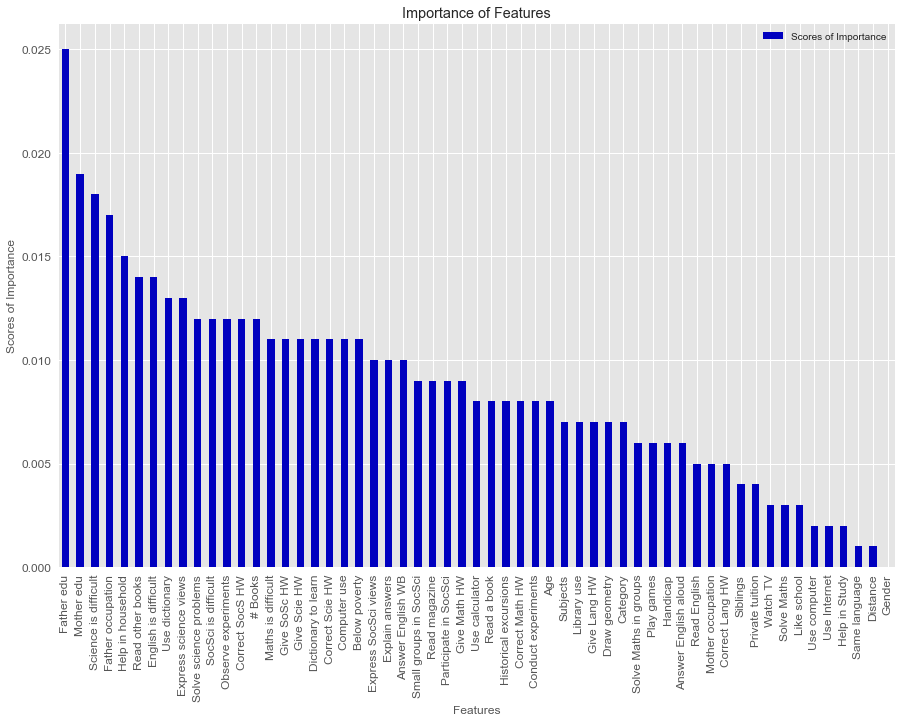

In [16]:

import matplotlib.pyplot as plt
my_colors = [(x/0.010, x/0.020, 0.75) for x in range(len(scoresdf))]
ax = scoresdf[['Features','Scores of Importance']].plot(kind='bar', title ="Importance of Features", use_index=False,color=my_colors, figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Scores of Importance", fontsize=12)
ax.set_xticklabels(scoresdf['Features'])
plt.show()


In [105]:
# Created  Random Forest Regressor model that identifies the most influencing feature on the Performance in Maths of the student
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
 
S = Pupil_feature_data.values
T = pupil_marks['Maths %'].values
names = Pupil_features
 
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
Mathsscores = []
for i in range(S.shape[1]):
     Mathsscore = cross_val_score(rf, S[:, i:i+1], T, scoring="r2",
                              cv=ShuffleSplit(len(S), 3, .3))
     Mathsscores.append((round(np.mean(Mathsscore), 3), names[i]))
print sorted(Mathsscores, reverse=True)
Mathsscoresdf=pd.DataFrame(sorted(Mathsscores, reverse=True)) 
Mathsscoresdf.columns= ["Maths Scores of Importance", "Features"]
Mathsscoresdf

[(0.01, 'Computer use'), (0.005, 'Help in household'), (0.005, 'Father occupation'), (0.004, 'Subjects'), (0.004, 'Maths is difficult'), (0.004, 'Father edu'), (0.004, 'Dictionary to learn'), (0.003, 'Solve science problems'), (0.003, 'Science is difficult'), (0.003, 'Correct Math HW'), (0.003, 'Below poverty'), (0.002, 'SocSci is difficult'), (0.002, 'Small groups in SocSci'), (0.002, 'Read a book'), (0.002, 'Play games'), (0.002, 'Participate in SocSci'), (0.002, 'Library use'), (0.002, 'Give SoSc HW'), (0.002, 'Give Scie HW'), (0.002, 'Give Math HW'), (0.002, 'Give Lang HW'), (0.002, 'Express science views'), (0.002, 'Express SocSci views'), (0.002, 'Correct SocS HW'), (0.002, 'Correct Scie HW'), (0.002, 'Correct Lang HW'), (0.001, 'Watch TV'), (0.001, 'Use dictionary'), (0.001, 'Solve Maths in groups'), (0.001, 'Siblings'), (0.001, 'Read other books'), (0.001, 'Read magazine'), (0.001, 'Read English'), (0.001, 'Private tuition'), (0.001, 'Observe experiments'), (0.001, 'Mother occu

,Maths Scores of Importance,Features
0,0.010,Computer use
1,0.005,Help in household
2,0.005,Father occupation
3,0.004,Subjects
4,0.004,Maths is difficult
5,0.004,Father edu
6,0.004,Dictionary to learn
7,0.003,Solve science problems
8,0.003,Science is difficult
9,0.003,Correct Math HW


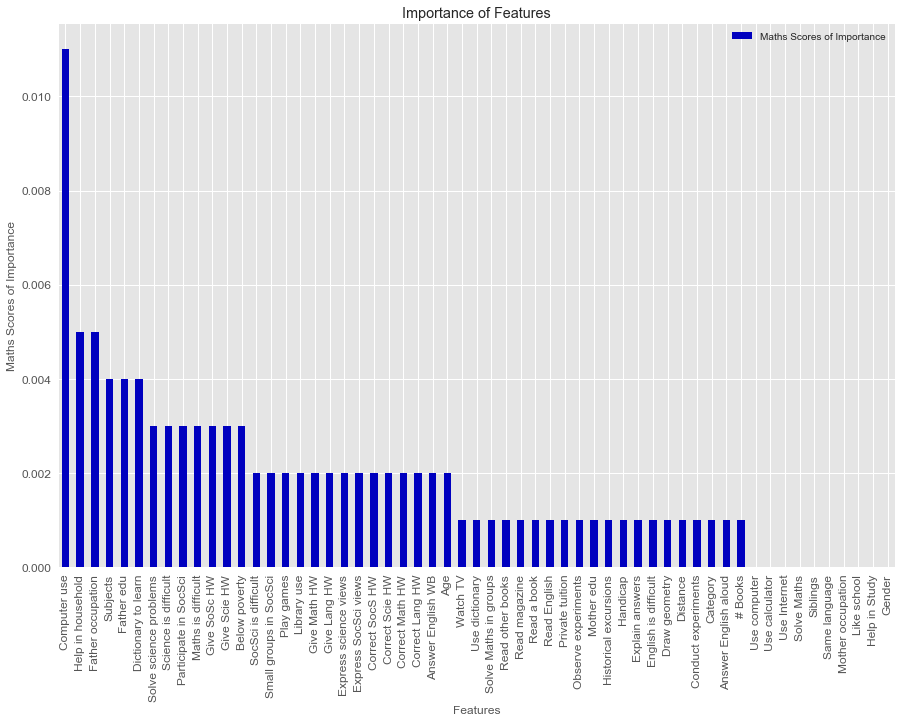

In [101]:
#Plotting a bar graph comparing the features Highest influence to lowest
import matplotlib.pyplot as plt
my_colors = [(x/0.010, x/0.020, 0.75) for x in range(len(Mathsscoresdf))]
ax = Mathsscoresdf[['Features','Maths Scores of Importance']].plot(kind='bar', title ="Importance of Features", use_index=False,color=my_colors, figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Maths Scores of Importance", fontsize=12)
ax.set_xticklabels(Mathsscoresdf['Features'])
plt.show()


In [100]:
# Created  Random Forest Regressor model that identifies the most influencing feature on the Performance in Reading of the student
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
 
A = Pupil_feature_data.values
B = pupil_marks['Reading %'].values
names = Pupil_features
 
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
Readingscores = []
for i in range(A.shape[1]):
     Readingscore = cross_val_score(rf, A[:, i:i+1], B, scoring="r2",
                              cv=ShuffleSplit(len(A), 3, .3))
     Readingscores.append((round(np.mean(Readingscore), 3), names[i]))
print sorted(Readingscores, reverse=True)
Readingscoresdf=pd.DataFrame(sorted(Readingscores, reverse=True)) 
Readingscoresdf.columns= ["Reading Scores of Importance", "Features"]
Readingscoresdf

[(0.021, 'Mother edu'), (0.021, 'Father edu'), (0.015, 'Father occupation'), (0.014, 'Use dictionary'), (0.013, 'Science is difficult'), (0.013, 'English is difficult'), (0.012, 'Read other books'), (0.011, '# Books'), (0.009, 'SocSci is difficult'), (0.009, 'Siblings'), (0.009, 'Read magazine'), (0.009, 'Explain answers'), (0.008, 'Use calculator'), (0.008, 'Give SoSc HW'), (0.008, 'Give Scie HW'), (0.008, 'Express science views'), (0.008, 'Correct SocS HW'), (0.008, 'Correct Scie HW'), (0.008, 'Computer use'), (0.008, 'Answer English WB'), (0.007, 'Solve science problems'), (0.007, 'Read a book'), (0.007, 'Observe experiments'), (0.007, 'Maths is difficult'), (0.007, 'Below poverty'), (0.007, 'Age'), (0.006, 'Mother occupation'), (0.006, 'Give Math HW'), (0.006, 'Express SocSci views'), (0.006, 'Draw geometry'), (0.006, 'Correct Math HW'), (0.006, 'Category'), (0.005, 'Solve Maths in groups'), (0.005, 'Small groups in SocSci'), (0.005, 'Participate in SocSci'), (0.005, 'Library use')

,Reading Scores of Importance,Features
0,0.021,Mother edu
1,0.021,Father edu
2,0.015,Father occupation
3,0.014,Use dictionary
4,0.013,Science is difficult
5,0.013,English is difficult
6,0.012,Read other books
7,0.011,# Books
8,0.009,SocSci is difficult
9,0.009,Siblings


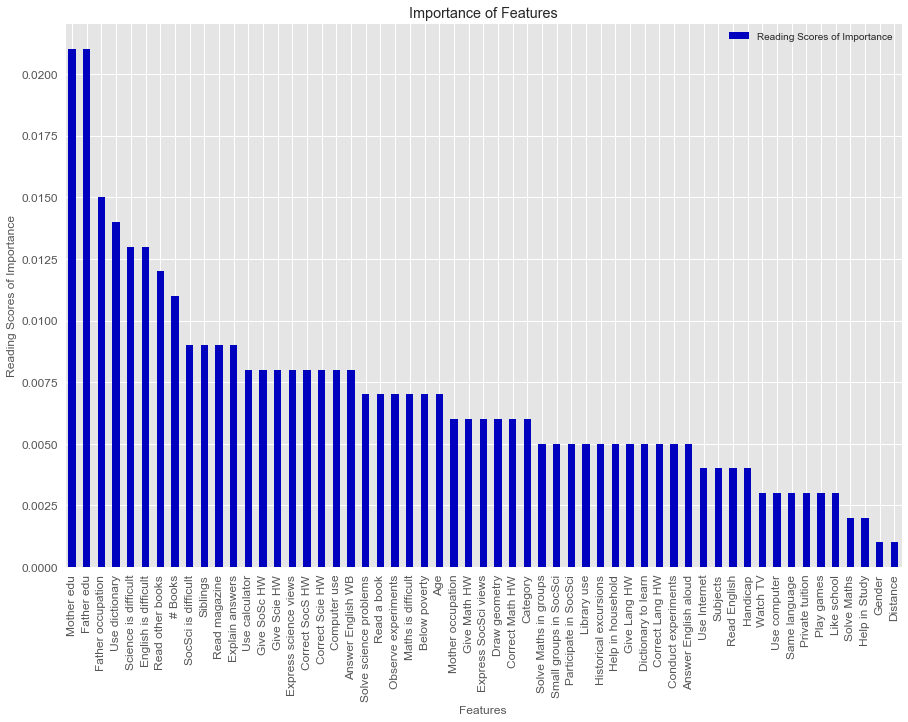

In [102]:
#Plotting a bar graph comparing the features Highest influence to lowest
import matplotlib.pyplot as plt
my_colors = [(x/0.010, x/0.020, 0.75) for x in range(len(Readingscoresdf))]
ax = Readingscoresdf[['Features','Reading Scores of Importance']].plot(kind='bar', title ="Importance of Features", use_index=False,color=my_colors, figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Reading Scores of Importance", fontsize=12)
ax.set_xticklabels(Readingscoresdf['Features'])
plt.show()

In [113]:
# Created  Random Forest Regressor model that identifies the most influencing feature on the Performance in Science of the student
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
 
P = Pupil_feature_data.values
Q = pupil_marks['Science %'].values
names = Pupil_features
 
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
Sciencescores = []
for i in range(P.shape[1]):
     Sciencescore = cross_val_score(rf, P[:, i:i+1], Q, scoring="r2",
                              cv=ShuffleSplit(len(P), 3, .3))
     Sciencescores.append((round(np.mean(Sciencescore), 3), names[i]))
print sorted(Sciencescores, reverse=True)
Sciencescoresdf=pd.DataFrame(sorted(Sciencescores, reverse=True)) 
Sciencescoresdf.columns= ["Science Scores of Importance", "Features"]
Sciencescoresdf

[(0.009, 'Father edu'), (0.008, 'Science is difficult'), (0.008, 'Mother edu'), (0.006, 'Father occupation'), (0.006, 'Dictionary to learn'), (0.005, 'Use dictionary'), (0.005, 'Solve science problems'), (0.005, 'SocSci is difficult'), (0.005, 'Read other books'), (0.005, 'Observe experiments'), (0.005, 'Help in household'), (0.005, 'Express science views'), (0.005, 'Computer use'), (0.004, 'Subjects'), (0.004, 'Give SoSc HW'), (0.004, 'Give Scie HW'), (0.004, 'Express SocSci views'), (0.004, 'English is difficult'), (0.004, 'Correct SocS HW'), (0.004, 'Correct Scie HW'), (0.004, '# Books'), (0.003, 'Use calculator'), (0.003, 'Small groups in SocSci'), (0.003, 'Read a book'), (0.003, 'Play games'), (0.003, 'Participate in SocSci'), (0.003, 'Maths is difficult'), (0.003, 'Library use'), (0.003, 'Historical excursions'), (0.003, 'Give Math HW'), (0.003, 'Give Lang HW'), (0.003, 'Explain answers'), (0.003, 'Correct Math HW'), (0.003, 'Conduct experiments'), (0.003, 'Category'), (0.003, 'B

,Science Scores of Importance,Features
0,0.009,Father edu
1,0.008,Science is difficult
2,0.008,Mother edu
3,0.006,Father occupation
4,0.006,Dictionary to learn
5,0.005,Use dictionary
6,0.005,Solve science problems
7,0.005,SocSci is difficult
8,0.005,Read other books
9,0.005,Observe experiments


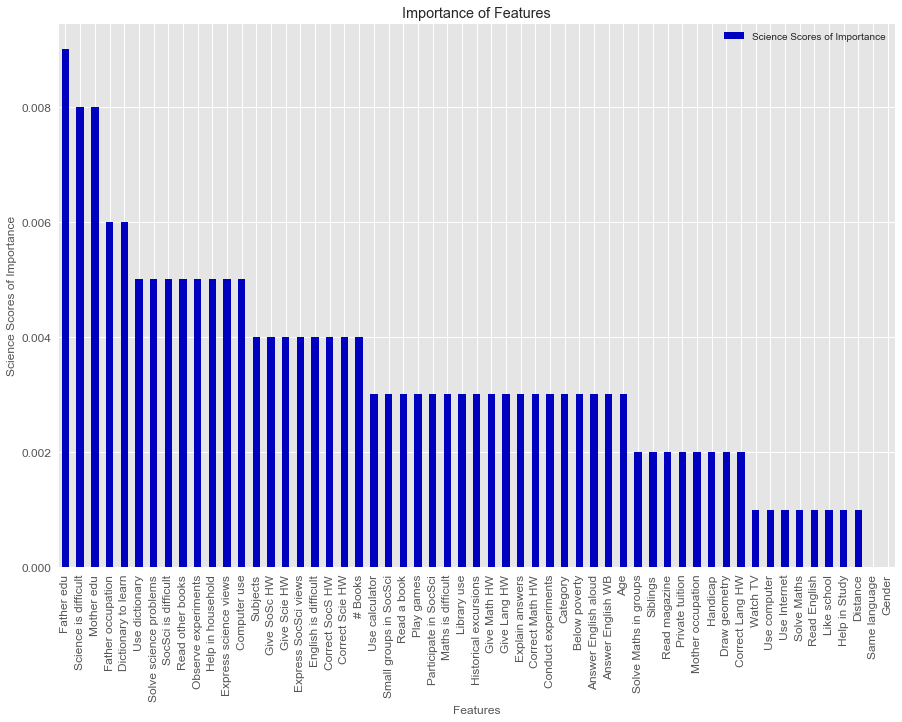

In [114]:
#Plotting a bar graph comparing the features Highest influence to lowest
import matplotlib.pyplot as plt
my_colors = [(x/0.010, x/0.020, 0.75) for x in range(len(Sciencescoresdf))]
ax = Sciencescoresdf[['Features','Science Scores of Importance']].plot(kind='bar', title ="Importance of Features", use_index=False,color=my_colors, figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Science Scores of Importance", fontsize=12)
ax.set_xticklabels(Sciencescoresdf['Features'])
plt.show()

In [115]:
# Created  Random Forest Regressor model that identifies the most influencing feature on the Performance in Social of the student
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
 
C = Pupil_feature_data.values
D = pupil_marks['Social %'].values
names = Pupil_features
 
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
Socialscores = []
for i in range(P.shape[1]):
     Socialscore = cross_val_score(rf, C[:, i:i+1], D, scoring="r2",
                              cv=ShuffleSplit(len(C), 3, .3))
     Socialscores.append((round(np.mean(Socialscore), 3), names[i]))
print sorted(Socialscores, reverse=True)
Socialscoresdf=pd.DataFrame(sorted(Socialscores, reverse=True)) 
Socialscoresdf.columns= ["Social Scores of Importance", "Features"]
Socialscoresdf

[(0.011, 'Help in household'), (0.006, 'Father edu'), (0.005, 'Solve science problems'), (0.005, 'Science is difficult'), (0.005, 'Mother edu'), (0.005, 'Father occupation'), (0.005, 'Computer use'), (0.004, 'SocSci is difficult'), (0.004, 'Small groups in SocSci'), (0.004, 'Read other books'), (0.004, 'Observe experiments'), (0.004, 'Give SoSc HW'), (0.004, 'Express science views'), (0.004, 'Express SocSci views'), (0.004, 'English is difficult'), (0.004, 'Dictionary to learn'), (0.004, 'Correct SocS HW'), (0.004, 'Correct Scie HW'), (0.004, 'Below poverty'), (0.003, 'Use dictionary'), (0.003, 'Read a book'), (0.003, 'Participate in SocSci'), (0.003, 'Maths is difficult'), (0.003, 'Library use'), (0.003, 'Historical excursions'), (0.003, 'Give Scie HW'), (0.003, 'Give Math HW'), (0.003, 'Explain answers'), (0.003, 'Correct Math HW'), (0.003, 'Answer English WB'), (0.003, '# Books'), (0.002, 'Use calculator'), (0.002, 'Subjects'), (0.002, 'Solve Maths in groups'), (0.002, 'Read magazin

,Social Scores of Importance,Features
0,0.011,Help in household
1,0.006,Father edu
2,0.005,Solve science problems
3,0.005,Science is difficult
4,0.005,Mother edu
5,0.005,Father occupation
6,0.005,Computer use
7,0.004,SocSci is difficult
8,0.004,Small groups in SocSci
9,0.004,Read other books


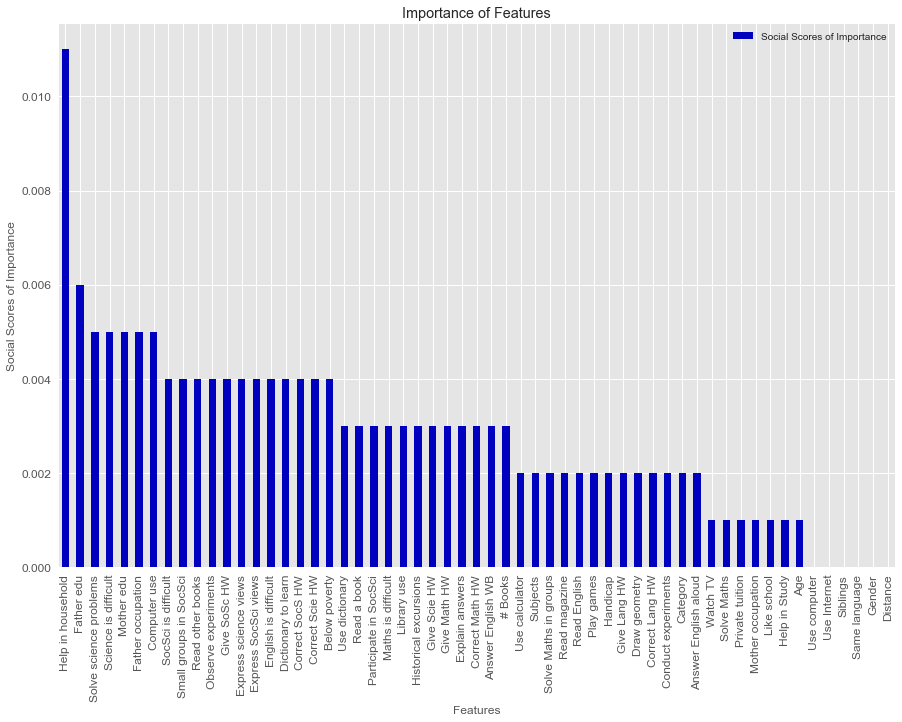

In [118]:
#Plotting a bar graph comparing the features Highest influence to lowest
import matplotlib.pyplot as plt
my_colors = [(x/0.010, x/0.020, 0.75) for x in range(len(Socialscoresdf))]
ax = Socialscoresdf[['Features','Social Scores of Importance']].plot(kind='bar', title ="Importance of Features", use_index=False,color=my_colors, figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Social Scores of Importance", fontsize=12)
ax.set_xticklabels(Socialscoresdf['Features'])
plt.show()

In [138]:
#creating a dataframe withscores and features that influence the Total Performance the most
df=scoresdf[['Scores of Importance','Features']]

### What influences students performance the most?

I started the analysis with basic data exploration and cleaning the data. The data of Marks has lot of NaN or Null values.So I have Imputed these values with mean of marks of all the students with non null values for each subject.  I have created a feature 'Performance' by calculating the average of all subjects ('Maths %', 'Reading %', 'Science %', 'Social %'). 

Now I have chosen Random Forest Regressor algorithm for most influencing feature selection which works by creating scores for each feature on how much is that feature influencing in the data. From the results of Random Forest Regressor algorithm I have found the best features influencing the students performance the most. Here is the list below 

|Parameter|Most Influencing Feature |
| --- |:--- |
|Total Performance|'Father edu'|
|Performance in Maths|'Computer Use'|
|Performance in Reading|'Mother edu'|
|Performance in Science|'Father edu'|
|Performance in Social|'Help in household'|

From the Graphs above we can see that individual Subjects marks are also influenced by many features mostly.
some are  
More Siblings in family influences more performance in both Reading % and Maths %
Using Dictionary influences Reading %
Language Hw influences Math %
State influences Maths %

Also Every Subjects Performance is influenced by few common features as listed below.
Father edu
Mother edu
help in Household
Father occupation

Checking all the features, ‘Father edu’ stands out first with much higher score than the second most influency feature.

# 2. How do boys and girls perform across states?

In [139]:
#Creating list of all States available in dataset
Statelist=pupil_marks['State'].unique()
Statelist

array(['AP', 'AR', 'BR', 'CG', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH',
       'KA', 'KL', 'MP', 'MH', 'MN', 'MG', 'MZ', 'NG', 'OR', 'PB', 'RJ',
       'SK', 'TN', 'TR', 'UP', 'UK', 'WB', 'AN', 'CH', 'PY', 'DN', 'DD'], dtype=object)

In [140]:
#Creating a total performance of Boys and Girls Seperately grouped by each State
i=0
columns = ['State','Performance_of_Boys', 'Performance_of_Girls']
rows = []
while i < len(Statelist):
    BoyPerformancedataforstate= pupil_marks[(pupil_marks.State==Statelist[i]) & (pupil_marks.Gender==1)].Performance
    GirlPerformancedataforstate= pupil_marks[(pupil_marks.State==Statelist[i]) & (pupil_marks.Gender==2)].Performance
    TotalPerfofGirl = np.sum(GirlPerformancedataforstate)
    TotalPerfofBoy = np.sum(BoyPerformancedataforstate)
    row = [Statelist[i], TotalPerfofBoy, TotalPerfofGirl]
    rows.append(row)
    i = i + 1
df = pd.DataFrame(rows, columns=columns)
statesdf=labels[labels['Column']=="State"]
print(statesdf)
df

    Column Name Level                Rename
208  State   AN    AN     Andaman & Nicobar
209  State   AP    AP        Andhra Pradesh
210  State   AR    AR     Arunachal Pradesh
211  State   BR    BR                 Bihar
212  State   CG    CG           Chattisgarh
213  State   CH    CH            Chandigarh
214  State   DD    DD           Daman & Diu
215  State   DL    DL                 Delhi
216  State   DN    DN  Dadra & Nagar Haveli
217  State   GA    GA                   Goa
218  State   GJ    GJ               Gujarat
219  State   HP    HP      Himachal Pradesh
220  State   HR    HR               Haryana
221  State   JH    JH             Jharkhand
222  State   JK    JK       Jammu & Kashmir
223  State   KA    KA             Karnataka
224  State   KL    KL                Kerala
225  State   MG    MG             Meghalaya
226  State   MH    MH           Maharashtra
227  State   MN    MN               Manipur
228  State   MP    MP        Madhya Pradesh
229  State   MZ    MZ           

,State,Performance_of_Boys,Performance_of_Girls
0,AP,131660.096031,153175.383547
1,AR,90199.087102,93244.732182
2,BR,136077.678388,145641.051009
3,CG,131325.525223,131559.389540
4,DL,120990.793558,151775.836886
5,GA,131369.386252,133908.446599
6,GJ,169814.154334,129593.546726
7,HR,105969.085513,124605.427744
8,HP,104446.108142,112807.150994
9,JK,83658.716098,93528.101629


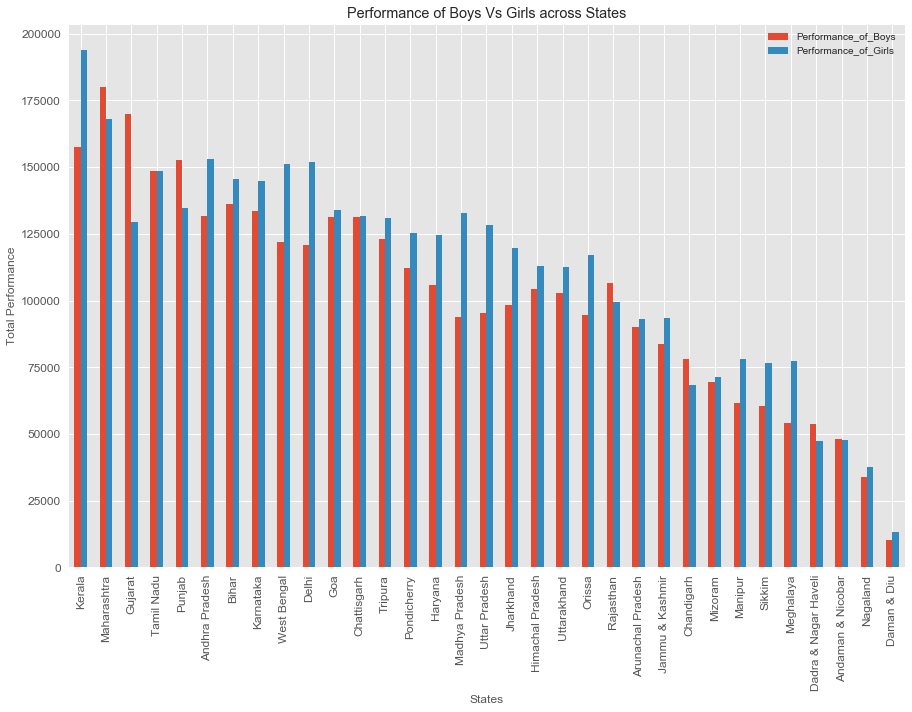

In [22]:
#Created a bar plot for above calulated Performance of Boys and Girls Comparing them for each State
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
sorteddf=df.assign(f = df['Performance_of_Boys']+ df['Performance_of_Girls']).sort_values('f',ascending=False).drop('f', axis=1)
sdf_joinfull=sorteddf.set_index('State').join(statesdf.set_index('Name'))
ax = sorteddf[['Performance_of_Boys','Performance_of_Girls']].plot(kind='bar', title ="Performance of Boys Vs Girls across States", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("States", fontsize=12)
ax.set_ylabel("Total Performance", fontsize=12)
ax.set_xticklabels(sdf_joinfull['Rename'])
plt.show()

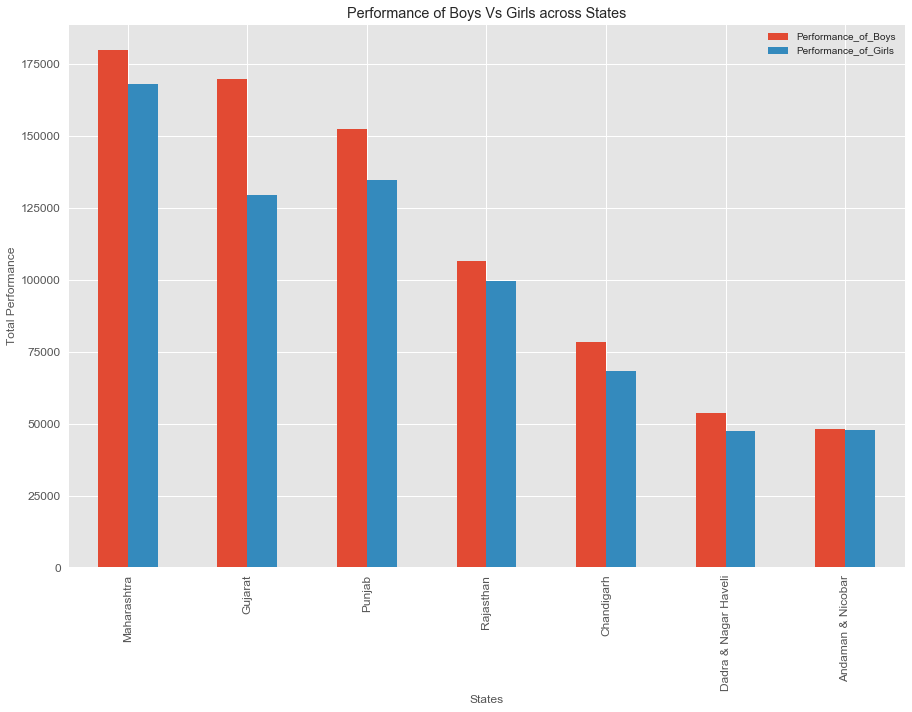

In [141]:
#Here Filtered the obtained data on States where Boys Perform better than Girls. So in the Below plot we can see the data only for states where Boys perform better than Girls.
BoysGGirls=df[df.Performance_of_Boys>df.Performance_of_Girls]
sortedBoysGGirlsdf=BoysGGirls.assign(f = df['Performance_of_Boys']+ df['Performance_of_Girls']).sort_values('f',ascending=False).drop('f', axis=1)
sdf_joinBgG=sortedBoysGGirlsdf.set_index('State').join(statesdf.set_index('Name'))
import matplotlib.pyplot as plt
ax = sortedBoysGGirlsdf[['Performance_of_Boys','Performance_of_Girls']].plot(kind='bar', title ="Performance of Boys Vs Girls across States", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("States", fontsize=12)
ax.set_ylabel("Total Performance", fontsize=12)
ax.set_xticklabels(sdf_joinBgG['Rename'])
plt.show()


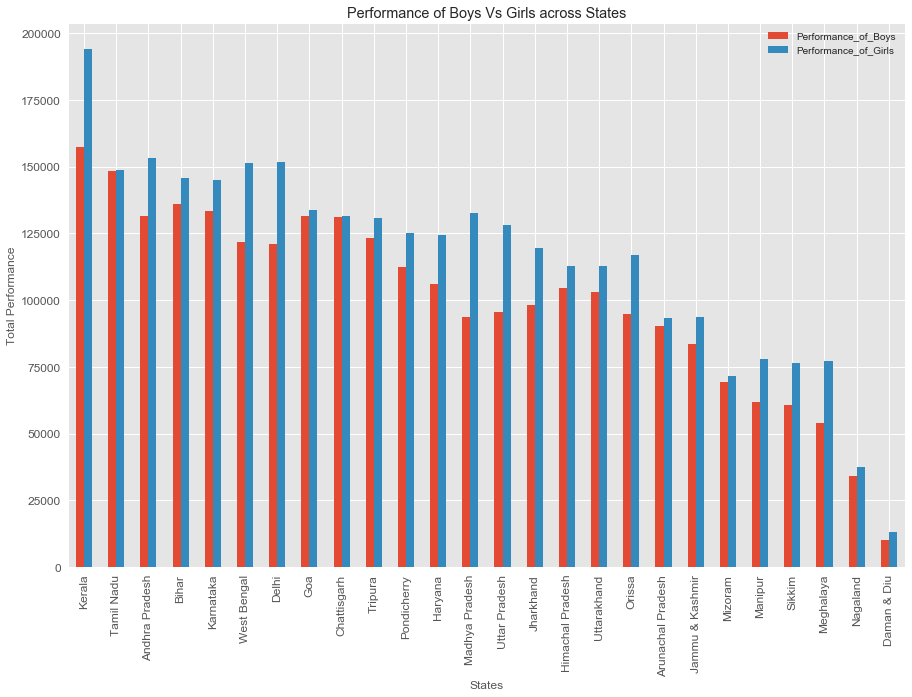

In [142]:
#Here Filtered the obtained data on States where Girls Perform better than Boys. So in the Below plot we can see the data only for states where Girls perform better than Boys.
import matplotlib.pyplot as plt
GirlsGBoys = df[df.Performance_of_Girls>df.Performance_of_Boys]
sortedGirlsGBoysdf=GirlsGBoys.assign(f = df['Performance_of_Boys']+ df['Performance_of_Girls']).sort_values('f',ascending=False).drop('f', axis=1)
sdf_joinGgB=sortedGirlsGBoysdf.set_index('State').join(statesdf.set_index('Name'))
ax = sdf_joinGgB[['Performance_of_Boys','Performance_of_Girls']].plot(kind='bar', title ="Performance of Boys Vs Girls across States", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("States", fontsize=12)
ax.set_ylabel("Total Performance", fontsize=12)
ax.set_xticklabels(sdf_joinGgB['Rename'])
plt.show()

# 3. Do students from South Indian states really excel at Math and Science?

In [ ]:
#Here I  have normalized the data of Performance of Boys and Girls (Min-Max Normalization)
boys_max_value = df['Performance_of_Boys'].max()
boys_min_value = df['Performance_of_Boys'].min()
df['Normalized_Perf_Boys'] = (df['Performance_of_Boys'] - boys_min_value) / (boys_max_value - boys_min_value)
girls_max_value = df['Performance_of_Girls'].max()
girls_min_value = df['Performance_of_Girls'].min()
df['Normalized_Perf_Girls'] = (df['Performance_of_Girls'] - girls_min_value) / (girls_max_value - girls_min_value)
# I have generated and plotted linear model comparing Performance of Boys With Girls
import seaborn as sns
withStatenames=df.set_index('State').join(statesdf.set_index('Name')) 
sns.lmplot( x="Normalized_Perf_Boys", y="Normalized_Perf_Girls",  size=15, data=withStatenames, fit_reg=True, hue='Rename', legend=False)
plt.legend(loc='lower right')
sns.plt.show()

In [153]:
# Here I have Seperated the States to North India and South India
NorthList = []
for k in range(pupil_marks.shape[0]):
        if pupil_marks.iloc[k]["State"] not in ['AP','GA','KA','KL','PY','TN']:
            NorthList.append(pupil_marks.iloc[k]["State"])
        else:
            NorthList.append("SOUTH")
pupil_marks["Sep_South_North"] = NorthList
pupil_marks

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Play games,Help in household,Maths %,Reading %,Science %,Social %,Performance,South,Average_of_Maths_Science,Sep_South_North
0,11011001001,AP,1,1,3,3,1,5,2,1,...,4,4,20.370000,46.208704,27.780000,38.357868,33.179143,SOUTH INDIA,24.075000,SOUTH
1,11011001002,AP,1,2,3,4,2,5,2,2,...,4,4,12.960000,46.208704,38.180000,38.357868,33.926643,SOUTH INDIA,25.570000,SOUTH
2,11011001003,AP,1,2,3,4,2,5,2,1,...,4,4,27.780000,70.000000,36.414637,38.357868,43.138126,SOUTH INDIA,32.097319,SOUTH
3,11011001004,AP,1,2,3,3,2,4,2,1,...,4,4,32.244413,56.670000,36.414637,36.000000,40.332263,SOUTH INDIA,34.329525,SOUTH
4,11011001005,AP,1,2,3,3,2,5,2,1,...,4,4,32.244413,46.208704,14.550000,8.330000,25.333279,SOUTH INDIA,23.397207,SOUTH
5,11011001006,AP,1,2,3,3,1,5,2,3,...,4,4,32.244413,23.330000,36.414637,30.000000,30.497263,SOUTH INDIA,34.329525,SOUTH
6,11011001007,AP,1,2,3,4,2,2,2,1,...,4,4,40.740000,70.000000,36.414637,38.357868,46.378126,SOUTH INDIA,38.577319,SOUTH
7,11011001008,AP,1,2,2,0,2,4,2,1,...,3,4,32.244413,26.670000,36.414637,22.920000,29.562263,SOUTH INDIA,34.329525,SOUTH
8,11011001009,AP,1,2,3,3,2,4,2,1,...,4,4,24.070000,46.208704,25.450000,38.357868,33.521643,SOUTH INDIA,24.760000,SOUTH
9,11011001010,AP,1,2,2,4,2,3,2,1,...,3,4,18.520000,26.670000,36.414637,38.357868,29.990626,SOUTH INDIA,27.467319,SOUTH


In [145]:
#Here I have seperated the entire data available into South India and other states of India
pupil_marks["South"]=pupil_marks["State"].isin(['AP','GA','KA','KL','PY','TN'])
pupil_marks["South"] = pupil_marks["South"].replace({True: 'SOUTH INDIA', False: 'REST OF INDIA'})
pupil_marks['Average_of_Maths_Science'] = pupil_marks[['Maths %','Science %']].apply(np.nanmean,axis=1)
Summarydf=pupil_marks[['State','Maths %','Science %','Average_of_Maths_Science','South','Sep_South_North']].describe()
SouthGroupbydf=pupil_marks[['State','Maths %','Science %','Average_of_Maths_Science','South','Sep_South_North']].groupby(by = "South").describe()
NorthGroupbydf = pupil_marks[['State','Maths %','Science %','Average_of_Maths_Science','South','Sep_South_North']].groupby(by = "Sep_South_North").describe()
print(Summarydf)
print(NorthGroupbydf)

             Maths %      Science %  Average_of_Maths_Science
count  185348.000000  185348.000000             185348.000000
mean       32.244413      36.414637                 34.329525
std        11.376419      10.443826                  8.071159
min         0.000000       0.000000                  0.000000
25%        27.780000      33.930000                 29.222319
50%        32.244413      36.414637                 33.397207
75%        32.244413      36.414637                 37.032207
max       100.000000     100.000000                 94.675000
                Average_of_Maths_Science                                \
                                   count       mean        std     min   
Sep_South_North                                                          
AN                                2510.0  35.198157  10.847653   2.560   
AR                                4985.0  32.935484   7.093476  11.785   
BR                                7297.0  35.399588   9.757358   4.390  

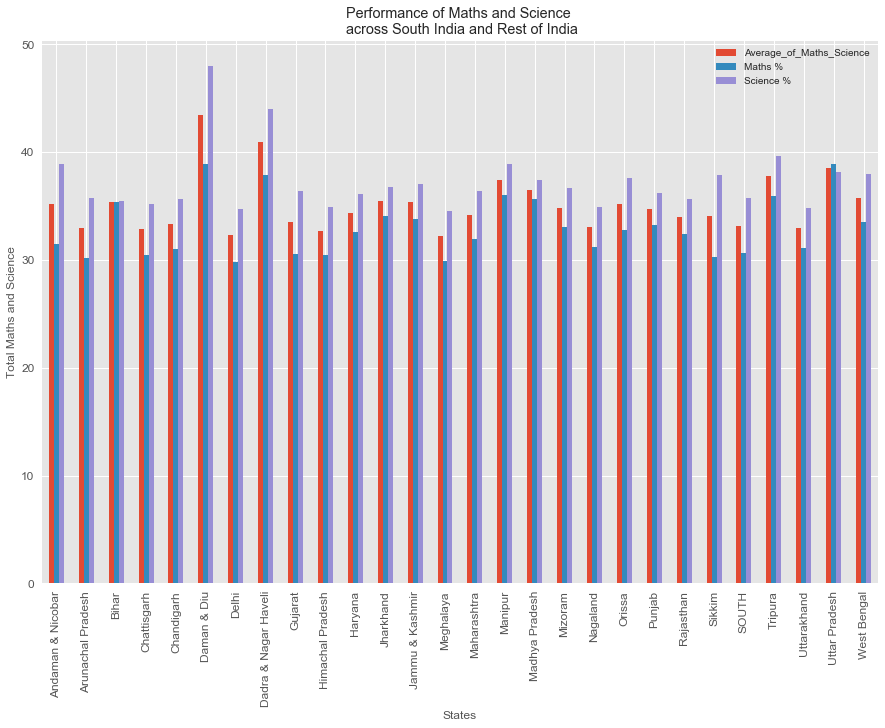

In [146]:
#Here I have Grouped the avearge performance of Maths and Science of all students by South India and Rest Of the India for Comparison
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches
plt.figure(figsize=(12,5))
pupil_marks['Average_of_Maths_Science'] = pupil_marks[['Maths %','Science %']].apply(np.nanmean,axis=1)
Maths_Sci_perfomance = pupil_marks.groupby(["Sep_South_North","South"]).mean()["Average_of_Maths_Science"].reset_index()
Maths_perfomance = pupil_marks.groupby(["Sep_South_North","South"]).mean()["Maths %"].reset_index()
Sci_perfomance = pupil_marks.groupby(["Sep_South_North","South"]).mean()["Science %"].reset_index()
fulljoined=pd.merge(pd.merge(Sci_perfomance,Maths_perfomance,on='Sep_South_North'),Maths_Sci_perfomance,on='Sep_South_North')
withStatenamesMat= pd.merge(fulljoined, statesdf, how='left',left_on=['Sep_South_North'], right_on=['Name'])
withStatenamesMat["Rename"]=withStatenamesMatSci["Rename"].fillna('SOUTH')

#Created Bar plot for comparison of Maths and Science Performances in South India and other states of India
import matplotlib.pyplot as plt
ax = withStatenamesMat[['Average_of_Maths_Science','Maths %','Science %']].plot(kind='bar', title ="Performance of Maths and Science \n across South India and Rest of India", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("States", fontsize=12)
ax.set_ylabel("Total Maths and Science", fontsize=12)
ax.set_xticklabels(withStatenamesMat['Rename'])
plt.show()


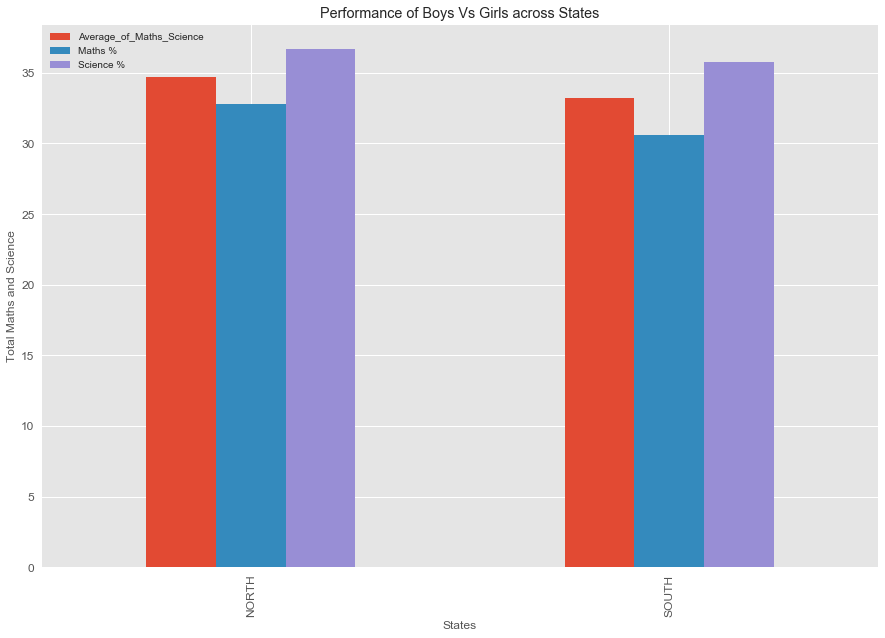

In [78]:
#Here I have calculated and plotted the performance of Maths and Science for South India and Rest of India combining States
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
pupil_marks['Average_of_Maths_Science'] = pupil_marks[['Maths %','Science %']].apply(np.nanmean,axis=1)
Maths_Sci_perfomance = pupil_marks.groupby(["South"]).mean()["Average_of_Maths_Science"].reset_index()
Maths_perfomance = pupil_marks.groupby(["South"]).mean()["Maths %"].reset_index()
Sci_perfomance = pupil_marks.groupby(["South"]).mean()["Science %"].reset_index()
fulljoined=pd.merge(pd.merge(Sci_perfomance,Maths_perfomance,on='South'),Maths_Sci_perfomance,on='South'
ax = fulljoined[['Average_of_Maths_Science','Maths %','Science %']].plot(kind='bar', title ="Maths and Science Performance of North States Vs South States", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("States", fontsize=12)
ax.set_ylabel("Total Maths and Science", fontsize=12)
ax.set_xticklabels(fulljoined['South'])
plt.show()

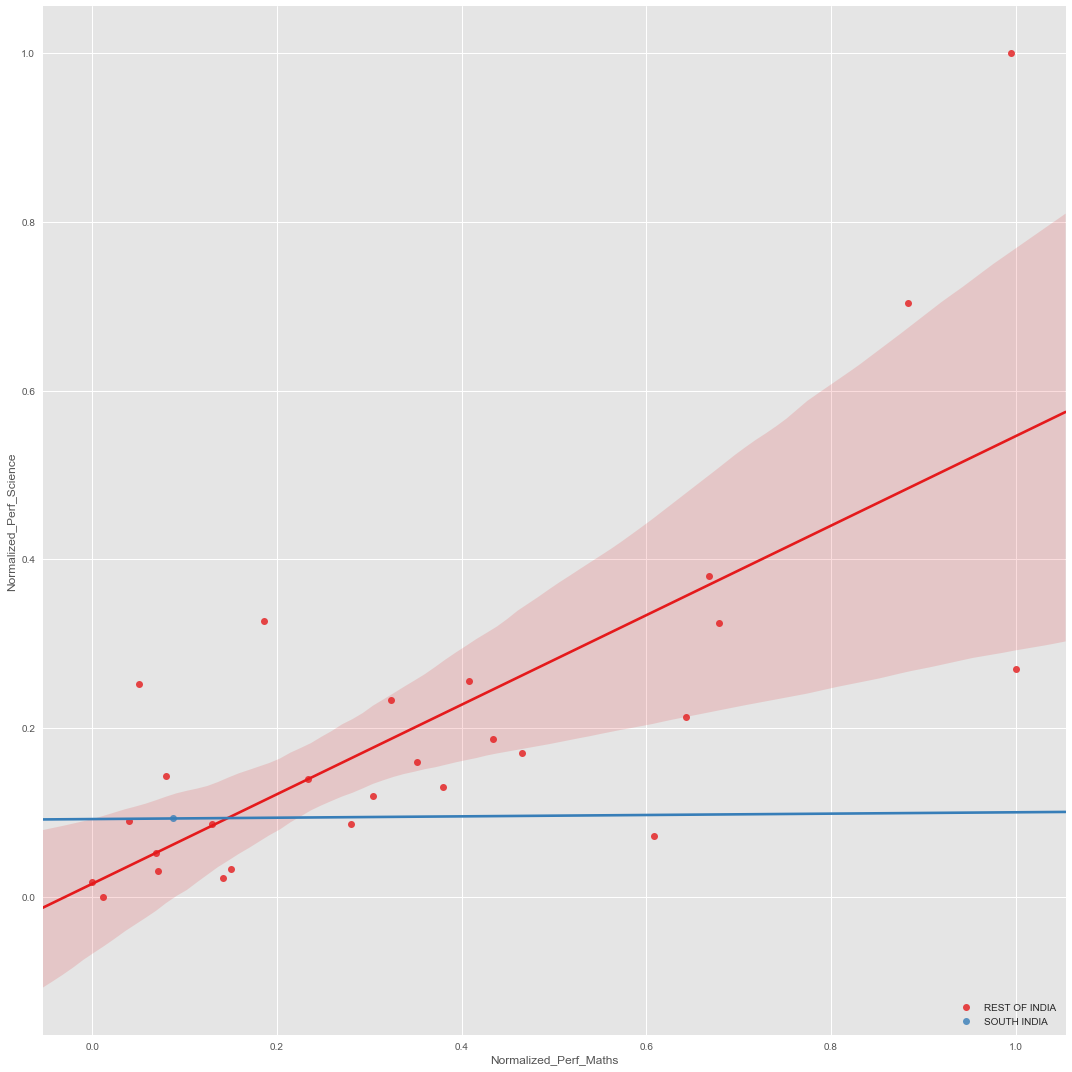

In [147]:
#Here I have normalized the data for Maths and Science performances and Created a linear model for comparison between South India and Rest of India in Maths and Science
Maths_max_value = fulljoined['Maths %'].max()
Maths_min_value = fulljoined['Maths %'].min()
fulljoined['Normalized_Perf_Maths'] = (fulljoined['Maths %'] - Maths_min_value) / (Maths_max_value - Maths_min_value)
science_max_value = fulljoined['Science %'].max()
science_min_value = fulljoined['Science %'].min()
fulljoined['Normalized_Perf_Science'] = (fulljoined['Science %'] - science_min_value) / (science_max_value - science_min_value)
import seaborn as sns
withStatenamesMatSci= pd.merge(fulljoined, statesdf, how='left',left_on=['Sep_South_North'], right_on=['Name'])
withStatenamesMatSci["Rename"]=withStatenamesMatSci["Rename"].fillna('SOUTH')
sns.lmplot( x="Normalized_Perf_Maths", y="Normalized_Perf_Science",  size=15, data=withStatenamesMatSci, fit_reg=True, hue='South',palette="Set1", legend=False)
plt.legend(loc='lower right')
sns.plt.show()

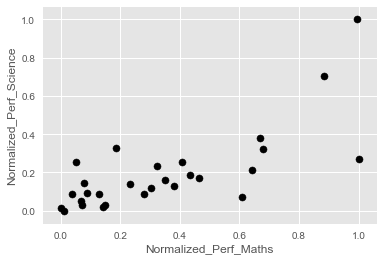

In [129]:
#Scatter plot to show the performances of Maths and Science.
colors = np.where(withStatenamesMatSci['Rename'], 'r', 'k')
withStatenamesMatSci.plot(kind='scatter', x='Normalized_Perf_Maths',y='Normalized_Perf_Science', s=50, c='k')

In [87]:
withStatenamesMatSci

,Sep_South_North,South_x,Science %,South_y,Maths %,South,Average_of_Maths_Science,Normalized_Perf_Maths,Normalized_Perf_Science,Column,Name,Level,Rename
0,AN,NORTH,38.892799,NORTH,31.503516,NORTH,35.198157,0.185893,0.326448,State,AN,AN,Andaman & Nicobar
1,AR,NORTH,35.697101,NORTH,30.173867,NORTH,32.935484,0.039532,0.089820,State,AR,AR,Arunachal Pradesh
2,BR,NORTH,35.457724,NORTH,35.341452,NORTH,35.399588,0.608354,0.072095,State,BR,BR,Bihar
3,CG,NORTH,35.183177,NORTH,30.443301,NORTH,32.813239,0.069190,0.051766,State,CG,CG,Chattisgarh
4,CH,NORTH,35.644643,NORTH,30.992499,NORTH,33.318571,0.129643,0.085936,State,CH,CH,Chandigarh
5,DD,NORTH,47.989248,NORTH,38.858377,NORTH,43.423812,0.995479,1.000000,State,DD,DD,Daman & Diu
6,DL,NORTH,34.711196,NORTH,29.814727,NORTH,32.262961,0.000000,0.016818,State,DL,DL,Delhi
7,DN,NORTH,43.980883,NORTH,37.836367,NORTH,40.908625,0.882981,0.703198,State,DN,DN,Dadra & Nagar Haveli
8,GJ,NORTH,36.416852,NORTH,30.536074,NORTH,33.476463,0.079402,0.143115,State,GJ,GJ,Gujarat
9,HP,NORTH,34.893754,NORTH,30.463572,NORTH,32.678663,0.071422,0.030336,State,HP,HP,Himachal Pradesh


In [148]:
pupil_marks['Average_of_Maths_Science'] = pupil_marks[['Maths %','Science %']].apply(np.nanmean,axis=1)
Southperfomance = pupil_marks.groupby(["South"]).mean()["Average_of_Maths_Science"].reset_index()
Southperfomance

,South,Average_of_Maths_Science
0,REST OF INDIA,34.707536
1,SOUTH INDIA,33.171863


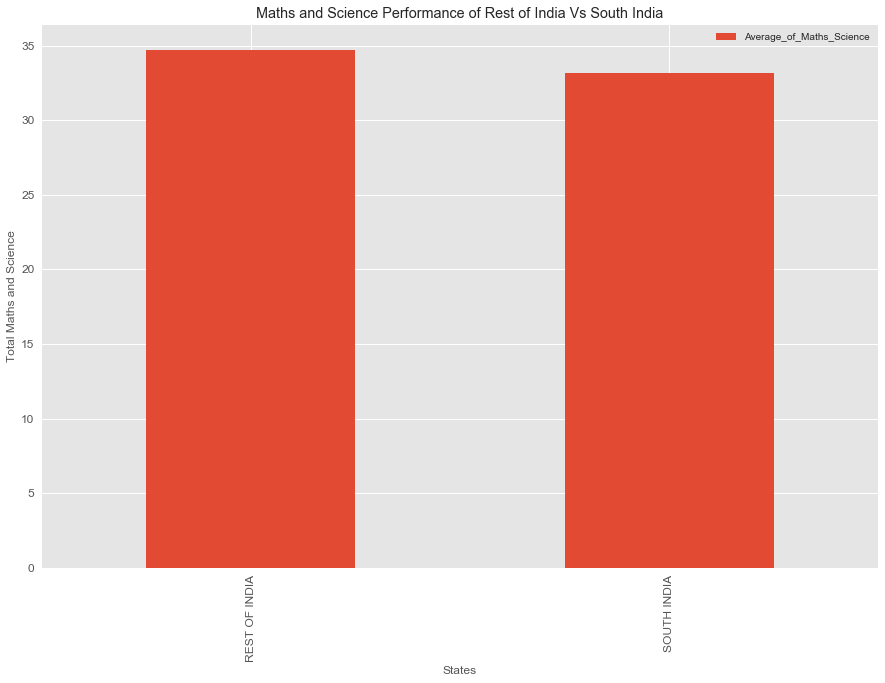

In [152]:
#Plotted a bar graph comparing the Overall Performance of Students in Maths and Science between South India and Rest of India
ax = Southperfomance[['Average_of_Maths_Science','South']].plot(kind='bar', title ="Maths and Science Performance of Rest of India Vs South India", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("States", fontsize=12)
ax.set_ylabel("Total Maths and Science", fontsize=12)
ax.set_xticklabels(Southperfomance['South'])
plt.show()

# 2. How do boys and girls perform across states?
## I have Created Features of Performance grouped by States by Gender (Boy, Girl) . Then I have calculated overall Performance ans average of all subjects Then I have Plotted the overall Performances Statewise comparing Performance of Boy Vs Girl. From The analysis I found that Girls Perform better than Boys

# 3.Do students from South Indian states really excel at Math and Science?
## I have created a feature of Avearge Performance in Maths and Science. I have segregated the states as South Indian States and Rest of India. Then I have Plotted the overall Performance in Maths and Science Comparing between south Indian Students and Student from Rest of India. From my Analysis I found that overall, North Indian Students are good at Maths and Science than South Indian Students